## Importing Dependencies

In [2]:
import qiskit
import matplotlib.pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

## Loading Data and getiing a look at the data

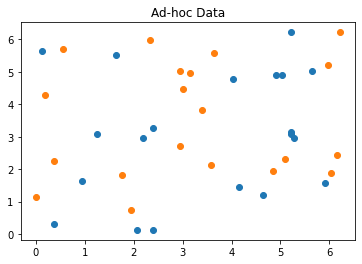

{'A': 0, 'B': 1}


In [3]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shot = 10000
sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size,
                                                                    test_size=testing_dataset_size,
                                                                    gap=0.3,
                                                                    n=feature_dim,
                                                                    plot_data=True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

## Running SVM in Quantum-Instances

In [4]:
#getting my backend
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map,training_input,test_input,None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend,shots=shot,seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

## Looking in my kernel matrix

kernel matrix during the training:


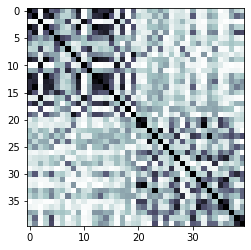

In [8]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')

## Getting the predictions and accuracy

In [9]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels,svm.label_to_class)
print('ground truth: {}'.format(datapoints[1]))
print('prediction: {}'.format(predicted_labels))
print('testing success ratio: ', result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio:  1.0


See, the QSVM classifies both the classes perfectly

## Comparing with classical SVM

After getting almost perfect result on quantum instances, now we want to compare wheather the classical SVM can
reach the same accuracy or not. In qiskit there is a implementation of SVM similar to Scikit-learn. Wr are going
use that here.

In [11]:
from qiskit.aqua.algorithms import SklearnSVM
svm_classical = SklearnSVM(training_input, test_input)
result_classical = svm_classical.run()

kernel matrix during the training:


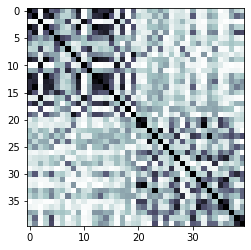

In [13]:
print("kernel matrix during the training:")
kernel_matrix_classical = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix_classical),interpolation='nearest',origin='upper',cmap='bone_r')

In [12]:
predicted_labels_classical = svm_classical.predict(datapoints[0])
predicted_classes_classical = map_label_to_class_name(predicted_labels,svm.label_to_class)
print('ground truth: {}'.format(datapoints[1]))
print('prediction: {}'.format(predicted_labels_classical))
print('testing success ratio: ', result_classical['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction: [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]
testing success ratio:  0.65


See, the classical SVM gets a accuracy of 65%. 

## Conclusion

In case of classification, finding a dividing hyperplane is often only possible in higher dimensions. This involves computing
the distances between the datapoints in higher dimensional space. So if the dimension is very large, finding the distances 
very computionally expensive.So the simplier thing we do is called the "Kernel Trick". The kernel is some easily computable
function that takes our datapoints and gives back a distance and the kernel can be optimized in order to maximize the distances
between the classes of our data. Unfortunately, some kernel metrices are difficult to copute classically. So this is where
Quantum Computer comes in.If the kernel can not be optimized classically, Quantum Machine Learning shows a lot of promise in 
being able to use the multidimensional computation space of the quantum computer in order to find the hyperplane.When data is
mapped from its input dimension into the Hilbert space of the quantum computer,it naturally cast into higher dimensional space.
So, the QSVM performs better than SVM.
